<a href="https://colab.research.google.com/github/MelliaSwin/C-Projects/blob/main/NST_%2B_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 857.8/857.8 kB 53.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 kB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 kB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 97.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 7.6

MONET_DATASET: WRAPPING THE IMAGES INTO A DATATSET

In [ ]:
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

# Define a custom dataset
class MonetDataset(Dataset):
    def __init__(self, folder_path, transform=None):
        self.folder_path = folder_path
        self.transform = transform
        self.image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = os.path.join(self.folder_path, self.image_files[idx])
        image = Image.open(img_name)
        if self.transform:
            image = self.transform(image)
        return image

# Define image transformations
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])  # For RGB images
])

# Create the dataset and dataloader
monet_dataset = MonetDataset('/content/drive/MyDrive/monetproj/monet_paintings', transform=transform)
dataloader = DataLoader(monet_dataset, batch_size=64, shuffle=True)  # Batch size is 64

# Print the number of images in the dataset
print(f'Number of images in dataset: {len(monet_dataset)}')

Number of images in dataset: 1072


GAN TRAINING

Epoch [0/2500], Step [0/17], d_loss: 1.5028843879699707, g_loss: 3.47491455078125
Epoch [1/2500], Step [0/17], d_loss: 0.056156739592552185, g_loss: 8.824560165405273
Epoch [2/2500], Step [0/17], d_loss: 2.488489866256714, g_loss: 13.823477745056152
Epoch [3/2500], Step [0/17], d_loss: 0.2883727252483368, g_loss: 8.395459175109863
Epoch [4/2500], Step [0/17], d_loss: 0.07261165976524353, g_loss: 4.3854594230651855
Epoch [5/2500], Step [0/17], d_loss: 1.219720721244812, g_loss: 9.9318208694458
Epoch [6/2500], Step [0/17], d_loss: 2.403557777404785, g_loss: 1.9664618968963623
Epoch [7/2500], Step [0/17], d_loss: 0.9108132123947144, g_loss: 2.929827928543091
Epoch [8/2500], Step [0/17], d_loss: 0.807418704032898, g_loss: 2.384847640991211
Epoch [9/2500], Step [0/17], d_loss: 0.5663180351257324, g_loss: 1.8668241500854492
Epoch [10/2500], Step [0/17], d_loss: 0.4756142497062683, g_loss: 3.1676225662231445
Epoch [11/2500], Step [0/17], d_loss: 0.8700436949729919, g_loss: 3.0607001781463623


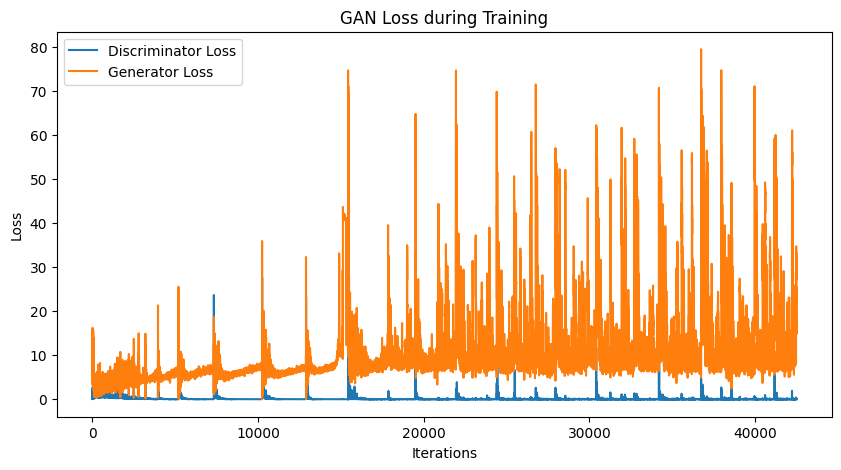

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision.utils import save_image
#from monet_dataset import dataloader

# Create a folder to save generated images and model checkpoints
output_folder = 'generated_images'
os.makedirs(output_folder, exist_ok=True)

# Define the Generator architecture
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.ConvTranspose2d(100, 512, 4, 1, 0, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 3, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, input):
        return self.main(input)

# Define the Discriminator architecture
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Conv2d(3, 64, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(256, 512, 4, 2, 1, bias=False),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(512, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input).view(-1)

# Training settings
batch_size = 64
lr = 0.0002
num_epochs = 2500
latent_dim = 100

# Initialize models
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
generator = Generator().to(device)
discriminator = Discriminator().to(device)

# Loss and optimizers
criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))

# Lists to keep track of loss values
d_losses = []
g_losses = []

# Training loop
for epoch in range(num_epochs):
    for i, data in enumerate(dataloader):
        # Train Discriminator
        real_images = data.to(device)
        batch_size = real_images.size(0)
        real_labels = torch.ones(batch_size, device=device)
        fake_labels = torch.zeros(batch_size, device=device)

        outputs = discriminator(real_images)
        d_loss_real = criterion(outputs, real_labels)

        z = torch.randn(batch_size, latent_dim, 1, 1, device=device)
        fake_images = generator(z)
        outputs = discriminator(fake_images.detach())
        d_loss_fake = criterion(outputs, fake_labels)

        d_loss = d_loss_real + d_loss_fake
        optimizer_D.zero_grad()
        d_loss.backward()
        optimizer_D.step()

        # Train Generator
        outputs = discriminator(fake_images)
        g_loss = criterion(outputs, real_labels)

        optimizer_G.zero_grad()
        g_loss.backward()
        optimizer_G.step()

        if i % 100 == 0:
            print(
                f'Epoch [{epoch}/{num_epochs}], Step [{i}/{len(dataloader)}], d_loss: {d_loss.item()}, g_loss: {g_loss.item()}')

        # Store loss values
        d_losses.append(d_loss.item())
        g_losses.append(g_loss.item())

    # Save generated images for every 100 epochs
    if epoch % 100 == 0:
        save_image(fake_images, os.path.join(output_folder, f'generated_images_{epoch}.png'))

    # Save model checkpoints every 50 epochs
    if epoch % 50 == 0:
        torch.save(generator.state_dict(), f'paths/monet_generator_epoch_{epoch}.pth')
        torch.save(discriminator.state_dict(), f'paths/monet_discriminator_epoch_{epoch}.pth')

# Final save
torch.save(generator.state_dict(), 'monet_generator_final.pth')
torch.save(discriminator.state_dict(), 'monet_discriminator_final.pth')

# Plot the loss curves
# Goal of gen is to produce realistic images that fool the discriminator
plt.figure(figsize=(10, 5))
# Discriminator loss indicates how well the discrim distinguishes real images from fake ones
plt.plot(d_losses, label='Discriminator Loss')  # Low discrim loss = discrim is better at classification
# Gen loss measures how well the gen achieves the goal of fooling the discriminator
# gen loss quantifies how successful the gen is at creating images that the discriminator classifies as real
plt.plot(g_losses, label='Generator Loss')  # Low gen loss = the gen produces more realistic images
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.title('GAN Loss during Training')
plt.savefig('loss_plot.png')
plt.show()





USING GAN WEIGHTS (PTH) GENERATE ONE IMAGE

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from PIL import Image
from torchvision import transforms
from torchvision.utils import save_image

#Define the Generator architecture (same as before)
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.ConvTranspose2d(100, 512, 4, 1, 0, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 3, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, input):
        return self.main(input)

#Load the pre-trained GAN generator
generator = Generator()
generator.load_state_dict(torch.load('/content/monet_generator_final.pth'))
generator.eval()

#Generate an initial styled image using GAN
z = torch.randn(1, 100, 1, 1)  # Latent vector
initial_image = generator(z).detach()  # Generate image and detach from graph

#Save the initial GAN-generated image
save_image(initial_image, 'initial_gan_image.png')

#Load the initial image using PIL
initial_image_pil = Image.open('initial_gan_image.png')

#Resize the image to 500 x 500
resized_image = initial_image_pil.resize((256, 256), Image.BILINEAR)

#Save the resized image
resized_image.save('resized_gan_image.png')

In [ ]:
!zip -r /content/paths.zip /content/paths/

  adding: content/paths/ (stored 0%)
  adding: content/paths/monet_discriminator_epoch_300.pth (deflated 8%)
  adding: content/paths/monet_generator_epoch_750.pth (deflated 7%)
  adding: content/paths/monet_generator_epoch_1700.pth (deflated 7%)
  adding: content/paths/monet_generator_epoch_200.pth (deflated 7%)
  adding: content/paths/monet_generator_epoch_1050.pth (deflated 7%)
  adding: content/paths/monet_discriminator_epoch_50.pth (deflated 8%)
  adding: content/paths/monet_discriminator_epoch_1650.pth (deflated 7%)
  adding: content/paths/monet_generator_epoch_2200.pth (deflated 7%)
  adding: content/paths/monet_discriminator_epoch_2400.pth (deflated 7%)
  adding: content/paths/monet_discriminator_epoch_1250.pth (deflated 7%)
  adding: content/paths/monet_generator_epoch_1150.pth (deflated 7%)
  adding: content/paths/monet_generator_epoch_1800.pth (deflated 7%)
  adding: content/paths/monet_discriminator_epoch_1450.pth (deflated 7%)
  adding: content/paths/monet_discriminator_epo

MONETIFY: NST

In [ ]:
import torch
import time  # track time
import torch.nn as nn
import torch.optim as optim
import gradio as gr  # Import Gradio for the UI
from PIL import Image  # This will be used to load the image (or images)
import torchvision.transforms as transforms  # Transforms to convert image to a tensor
import torchvision.models as models  # Loads vgg19 (which is also manually installed in computer, code in the path*)
from torchvision.models import VGG19_Weights  # Rids outdated pretrained parameter
from torchvision.utils import save_image  # Store the generated image at the end

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
image_size = 256  # Specify image size

# Image loader
loader = transforms.Compose([
    transforms.Resize((image_size, image_size)),  # All images must be of the SAME SIZE! or we won't be able to subtract them when computing loss
    transforms.ToTensor(),
])

# VGG model class
class VGG(nn.Module):
    def __init__(self):
        super(VGG, self).__init__()
        self.chosen_features = ['0', '5', '10', '19', '28']  # Conv layers we are taking
        self.model = models.vgg19(weights=VGG19_Weights.IMAGENET1K_V1).features[:29]  # Go up to 29, where we have inclusive of 28

    def forward(self, x):
        features = []  # We're going to store features in an empty array/list, these features will be the relevant features
        for layer_num, layer in enumerate(self.model):
            x = layer(x)  # We can send in x through the layer and our output will be called x
            if str(layer_num) in self.chosen_features:  # If string of layer_num is in self.chosen_features, then store it
                features.append(x)
        return features  # Lastly, return features

# Now create a function that can load an image, PIL library used here
def load_image(image_name):
    image = Image.open(image_name)
    image = loader(image).unsqueeze(0)  # Unsqueeze 0 to add another dimension for the batch size, which will be 1
    return image.to(device)

# Monetification function
def monetify_image(original_image_path, total_steps=1100, learning_rate=0.001):
    style_image_path = '/content/refined/6003.jpg'  # Path to your Monet style image
    original_img = load_image(original_image_path)
    style_img = load_image(style_image_path)

    model = VGG().to(device).eval()  # .eval() to freeze the weights
    generated = original_img.clone().requires_grad_(True)  # Essential to freeze the network, so the only thing that changes is the generated image

    alpha = 1  # Different numbers in the paper
    beta = 0.01  # Different numbers in the paper
    optimizer = optim.Adam([generated], lr=learning_rate)  # Normally would do model.parameters, but we use generated to optimize the image
    # then send in the learning rate

    start_time = time.time()  # Track start time

    for step in range(total_steps):  # How many times the image will be modified
        generated_features = model(generated)  # We need to send in each of the 3 images through the VGG network
        original_features = model(original_img)
        style_features = model(style_img)

        style_loss = original_loss = 0
        # now we'll iterate through all the features for the chosen layers:
        for gen_feature, orig_feature, style_feature in zip(generated_features, original_features, style_features):  # Everything in the 5 conv layers
            batch_size, channel, height, width = gen_feature.shape  # remember our batch size is only one!
            original_loss += torch.mean((gen_feature - orig_feature) ** 2)  # From equation

            # Compute the Gram Matrix
            # Here, we've multiplied every pixel value from each channel with every other channel for the generated features
            # this is then later subtracted with style gram matrix
            G = gen_feature.view(channel, height * width).mm(  # Matrix multiplication
                gen_feature.view(channel, height * width).t()  # Transpose
            )

            # Calculate gram matrix for style
            A = style_feature.view(channel, height * width).mm(
                style_feature.view(channel, height * width).t()
            )

            # Now that we have both matrices, we calculate style loss
            style_loss += torch.mean((G - A) ** 2)

        # After, calculate total loss
        total_loss = alpha * original_loss + beta * style_loss
        optimizer.zero_grad()
        total_loss.backward()
        optimizer.step()

        if step % 100 == 0:  # Log more frequently for testing
            print(f'Step [{step}/{total_steps}], Total Loss: {total_loss.item()}')
            save_image(generated, f'/content/generated/generated_{step}.png')

    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f'Total time for {total_steps} steps: {elapsed_time} seconds')

    output_image = generated.detach().cpu()
    output_image_pil = transforms.ToPILImage()(output_image.squeeze(0))
    return output_image_pil

# Gradio interface
def gradio_interface(original_image):
    # Save the uploaded image temporarily
    original_image.save("original_image.jpg")

    # Run the monetify function
    result_image = monetify_image("original_image.jpg")
    return result_image

# Gradio UI setup
iface = gr.Interface(
    fn=gradio_interface,
    inputs=gr.Image(type="pil"),
    outputs=gr.Image(type="pil"),
    title="Monetify Your Image",
    description="Upload an image to see it transformed in the style of Monet!"
)

# Launch the Gradio app
iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://31c6bb59142d3049b2.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
